## Project Blueprint

Table of Contents
1) Introduction
2) Questions
3) Data Wrangling
Load packages & gathering data
Assessing data
Cleaning and trimming data
4) Exploratory Data Analysis
Research Question 1
Research Question 2
Research Question 3
Research Question 4
Research Question 5
Research Question 6
Research Question 7
5) Conclusions
6) References


Table of Contents
1. Introduction
1.1. First impressions
1.2. Questions
2. Data Wrangling
2.1. General Properties
2.2. Data Cleaning
3. Exploratory Data Analysis
3.1. Age
3.2. Waiting days
3.2.1. Analysing the decrease after a month
3.3. Received sms
3.4. Appointment week day
3.5. Gender
3.6. Neighbourhood
3.7. Patient Id
3.8. Answering questions
4. Conclusion

> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Exploratory Analysis of Medical Appointment No-shows Dataset
<br><br>
## Table of Contents<br>
<ul>
<li><a href="#intro">Introduction</a></li><br>
    <li style="margin-left:3%"><a href="#initial">Initial observations</a></li>
    <li style="margin-left:3%"><a href="#quest">Questions</a></li><br>
<li><a href="#wrangling">Data Wrangling</a></li><br>
<li><a href="#eda">Exploratory Data Analysis</a></li><br>
<li><a href="#conclusions">Conclusions</a></li><br>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
<br><br>
> The focus of this analysis would be to explore the question of whether or not patients show up for their appointment.



#### Import libraries and load dataset

In [3]:
# Import necessary libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# load dataset to a pandas dataframe
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [146]:
df1 = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [5]:
# view top of dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:

df.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
50026,1.771916e+14,5559563,F,2016-04-08T07:54:52Z,2016-05-03T00:00:00Z,78,JARDIM DA PENHA,0,1,0,0,0,1,Yes
98899,7.796657e+14,5598079,F,2016-04-19T07:12:59Z,2016-06-08T00:00:00Z,51,ITARARÉ,0,0,0,0,0,1,No
24604,5.414642e+12,5698266,F,2016-05-16T07:25:17Z,2016-05-18T00:00:00Z,71,JARDIM CAMBURI,0,0,0,0,0,0,No
41224,1.745486e+11,5737763,F,2016-05-25T10:00:42Z,2016-05-25T00:00:00Z,17,JABOUR,0,0,0,0,0,0,No
50136,3.855747e+14,5568697,F,2016-04-11T15:08:17Z,2016-05-03T00:00:00Z,77,JARDIM DA PENHA,0,1,0,0,0,1,Yes


In [7]:
# view number of rows and columns
print(f'Dataset has {df.shape[0]} rows and {df.shape[1]} columns')

Dataset has 110527 rows and 14 columns


In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='initial'></a>
### Intial observations
> * The dataset contains over 110k observations and 14 features.
> * The naming of the columns is inconsistent and should be modified.
> * The __"No-show"__ feature appears to be the only dependent variable, mostly likely having 'Yes' and 'No' entries (where 'Yes' implies the patient did not show up for the appointment while 'No' indicates that they did show up.
> * We observe the minimum age is a negative value of -1, which does not make sense. This would require further looking into.
> * The **PatientID** and **Appointment** do not appear to be helpful to this analysis. It isn't obvious whether the dataset accounts for multiple appointment bookings for the same patient.
> * 

#### Key Note:
* Worthy of note is the fact that the analysis in this prroject is strictly descriptive and hence, possesses no predictive power.
* In this analysis, I will focus on the **status (formerly no-show), age, hypertension, sms_received, gender, scheduled_day,** and **appointment_day** variables.

<a id='quest'></a>
### Questions <br>

From the dataset documentation and preliminary observations above, here are some questions I hope to explore in this project.

> * My primary question would be to ascertain whether the features I have chosen to explore directly influence a patient's likelihood to miss or show up for their appointment, and which features influence **status** the most. 
> * Which gender is more likely to show up or not for an appointment, and how much of this is due to that gender's prevalence in the dataset? Using proportions?
> * What is the relationship between longer waiting times (time between the scheduling date and the actual appointment) and the likelihood of missing an appointment?
> * Do older or younger folks tend to miss their appointments?
> * Do the patients who received an SMS tend to show up for their appointment(s)?
> * What is the relationship between hypertension and the tendency to not show for an appointment? 

<a id='wrangling'></a>
## Data Wrangling  <br>

In this section the data will be analysed and cleaned, dealing with missing values or weird values.

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.


### General Properties/Assessment
<br>
Here, I want to get a high-level overview of the dataset characteristics/properties, and also try to identify any faults or inconsistencies in the data quality and overall structure. I will be looking out for data types, missing values, duplicates, errant/outlier values, etc.


In [9]:
# basic stats of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [10]:
# general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [11]:
# view column data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [12]:
# Check for duplicate rows
df.duplicated().sum()

0

To investigate the uncertainty of one patient scheduling more than one appointment:

In [18]:
df.PatientId.duplicated().sum()

48228

In [20]:
df.AppointmentID.duplicated().sum()

0

To further check out the negativ3e age value observed in the initial observations. Are there other negative values?

In [22]:
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [23]:
# view number of unique entries per column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [36]:
# # Let's see what these unique values look like.

for col in df.iloc[:, np.r_[2,5,7:14]].columns:
    print(f"{col}   ===>  ", sorted(df[f'{col}'].unique()), '\n')

Gender   ===>   ['F', 'M'] 

Age   ===>   [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115] 

Scholarship   ===>   [0, 1] 

Hipertension   ===>   [0, 1] 

Diabetes   ===>   [0, 1] 

Alcoholism   ===>   [0, 1] 

Handcap   ===>   [0, 1, 2, 3, 4] 

SMS_received   ===>   [0, 1] 

No-show   ===>   ['No', 'Yes'] 



#### Summary/observation
> * There are no missing values in the dataset
> * The data types for **scheduled_day** and **appointment_day** are not convenient. They should be changed to _datetime_.
> * The data type for **No-show** is not appropriate; the **Boolean** type would be better.
> * There are no duplicate rows in the dataset.
> * We also need to change the data type of categorical variables to _categorical_ to make things easier.
> * There are duplicates in the PatientId column, hence, a patient can have more than one appointment. This means the column is useful afterall.
> * There is only one entry with a negative value for **Age** and is probably a random error. It should be dropped.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning

In [68]:
### First I'll rename the columns to a more readable and consistent format
labels = ['patient_id', 'appointment_id', 'gender', 'scheduled_day', 'appointment_day','age',
          'neighbourhood', 'scholarship', 'hypertension','diabetes', 'alcoholism',
          'handicap', 'sms_received', 'status']
df.columns = labels

In [69]:
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'status'],
      dtype='object')

In [70]:
## Next, I'll change the dtypes for the scheduled_day and appointment_day to datetime

df.scheduled_day = pd.to_datetime(df.scheduled_day)
df.appointment_day = pd.to_datetime(df.appointment_day)

# convert patient_id to int then to string
df['patient_id'] = df['patient_id'].astype('int64')
df['patient_id'] = df['patient_id'].astype('str')

In [71]:
## We'll also want to change the type for the categorical features we'll be using to 'categorical'
df['gender'] = df['gender'].astype('category')
df['sms_received'] = df['sms_received'].astype('category')
df['hypertension'] = df['hypertension'].astype('category')
df['status'] = df.status.astype('category')

In [85]:
### Now to modify the category values for the above for easier manipulation

# adjust categories to avoid the confusion with Yes and No not meaning what we would expect,
# as mention in the initial observations section
df.status.cat.rename_categories({'No':'Show','Yes':'No Show'}, inplace = True)
#similarly
df.gender.cat.rename_categories({'F':'Female','M':'Male'}, inplace = True)
df.hypertension.cat.rename_categories({0:'Not Hypertensive', 1:'Hypertensive'}, inplace = True)

In [88]:
df.dtypes

patient_id                      object
appointment_id                   int64
gender                        category
scheduled_day      datetime64[ns, UTC]
appointment_day    datetime64[ns, UTC]
age                              int64
neighbourhood                   object
scholarship                      int64
hypertension                  category
diabetes                         int64
alcoholism                       int64
handicap                         int64
sms_received                  category
status                        category
dtype: object

In [89]:
## To remove the singular row with a negative value for the 'age' column
df.drop(df.query('age == -1').index, axis=0, inplace=True)

In [91]:
## To confirm that worked
df.query('age == -1')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,status


In [100]:
## I will now calculate the waiting time for each appointment and create a
## new column to store the values

df['waiting_days'] = (df.appointment_day - df.scheduled_day).abs().dt.days
df.waiting_days.head(8)

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
Name: waiting_days, dtype: int64

The **age** feature has a relatively wide range of values, so it would make sense to split the column into intervals, and create a new column for that.

In [113]:
df['age_range'] = pd.cut(df.age, labels = ['0 - 4','5 - 14','15 - 24', '25 - 44',
                            '45 - 64', '65 - 115'], bins = [0,5,15,25,45,65,116])

df.age_range.head()

0    45 - 64
1    45 - 64
2    45 - 64
3     5 - 14
4    45 - 64
Name: age_range, dtype: category
Categories (6, object): [0 - 4 < 5 - 14 < 15 - 24 < 25 - 44 < 45 - 64 < 65 - 115]

Now, I'm going to select only the columns I will be using for this analysis.

In [140]:
## First I'll store a copy of the entire cleaned dataset in another variable in case we
## might need to get another column later on. Who knows?
df_copy = df.copy()
df_copy.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,status,waiting_days,age_interval
0,29872499824296,5642903,Female,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,Hypertensive,0,0,0,0,Show,0,45 - 64
1,558997776694438,5642503,Male,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,Not Hypertensive,0,0,0,0,Show,0,45 - 64
2,4262962299951,5642549,Female,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,Not Hypertensive,0,0,0,0,Show,0,45 - 64
3,867951213174,5642828,Female,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,Not Hypertensive,0,0,0,0,Show,0,5 - 14
4,8841186448183,5642494,Female,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,Hypertensive,1,0,0,0,Show,0,45 - 64


In [132]:
# For loop to know the column positions to use in the column selection
for i,j in enumerate(df.columns):
    print(i,j, end='\t')

0 patient_id	1 appointment_id	2 gender	3 scheduled_day	4 appointment_day	5 age	6 neighbourhood	7 scholarship	8 hypertension	9 diabetes	10 alcoholism	11 handicap	12 sms_received	13 status	14 waiting_days	15 age_interval	

In [143]:
# Now to select the desired columns
df = df.iloc[:, np.r_[0,2:6,8,12:16]]
df.head()

,patient_id,gender,scheduled_day,appointment_day,age,hypertension,sms_received,status,waiting_days,age_interval
0,29872499824296,Female,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,Hypertensive,0,Show,0,45 - 64
1,558997776694438,Male,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,Not Hypertensive,0,Show,0,45 - 64
2,4262962299951,Female,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,Not Hypertensive,0,Show,0,45 - 64
3,867951213174,Female,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,Not Hypertensive,0,Show,0,5 - 14
4,8841186448183,Female,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,Hypertensive,0,Show,0,45 - 64


Here are the columns that were selected:
> * patient_id
> * gender
> * scheduled_day
> * appointment_day
> * age
> * hypertension
> * sms_received
> * status
> * waiting_days
> * age_interval


Now the dataset is cleaned and ready to be used for analysis. Time to explore!

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000217175BB2E8>,
      dtype=object)

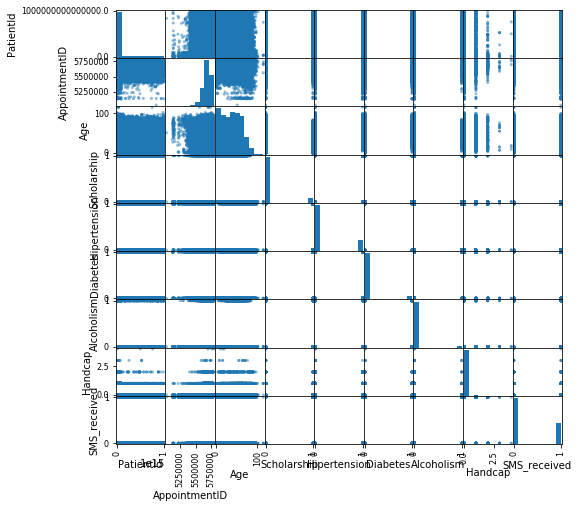

### Research Question 1 

### References <br>
* https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed
* njkl
* jjkk